<a href="https://colab.research.google.com/github/omar907/Siamese-Network-for-Car-Recognition/blob/master/Siamese_Network_for_Car_Recoginition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Siamese Network for Car Recognition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import image, patches

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation, concatenate
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Lambda, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.utils import np_utils

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score, classification_report, confusion_matrix

import skimage
from skimage.io import imread, imshow, imsave
from skimage import transform
from skimage.transform import resize, rotate
from skimage.color import rgb2gray, gray2rgb

import scipy
from scipy.io import  loadmat

import seaborn as sn

import h5py
import pickle
import math
import time
from time import time, sleep
from copy import deepcopy
import random
from shutil import move, copy, copytree
from zipfile import ZipFile

import cv2

# Tensorboard
from tensorflow.keras.callbacks import TensorBoard
# Load the TensorBoard notebook extension
%load_ext tensorboard

from IPython.display import clear_output

tf.__version__

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'2.2.0'

# Loading Data_name_batches and stack them together

In [ ]:
%cd '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate'

/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate


In [ ]:
with open('data_name_batches/training_pair_names_b1.pickle', 'rb') as f:
    train_pos_pair_names1, train_neg_pair_names1 = pickle.load(f)
train_pos_pair_names1, train_neg_pair_names1 = list(train_pos_pair_names1), list(train_neg_pair_names1)

with open('data_name_batches/training_pair_names_b6.pickle', 'rb') as f:
    train_pos_pair_names2, train_neg_pair_names2 = pickle.load(f)
train_pos_pair_names2, train_neg_pair_names2 = list(train_pos_pair_names2), list(train_neg_pair_names2)

with open('data_name_batches/training_pair_names_b3.pickle', 'rb') as f:
    train_pos_pair_names3, train_neg_pair_names3 = pickle.load(f)
train_pos_pair_names3, train_neg_pair_names3 = list(train_pos_pair_names3), list(train_neg_pair_names3)

with open('data_name_batches/Stanford_train_pair_names.pickle', 'rb') as f:
    stanford_train_pos_pair_names1, stanford_train_neg_pair_names1 = pickle.load(f)
stanford_train_pos_pair_names1, stanford_train_neg_pair_names1 = list(stanford_train_pos_pair_names1), list(stanford_train_neg_pair_names1)

with open('data_name_batches/Stanford_train_pair_names2.pickle', 'rb') as f:
    stanford_train_pos_pair_names2, stanford_train_neg_pair_names2 = pickle.load(f)
stanford_train_pos_pair_names2, stanford_train_neg_pair_names2 = list(stanford_train_pos_pair_names2), list(stanford_train_neg_pair_names2)

train_pos_pair_names = train_pos_pair_names1 + stanford_train_pos_pair_names1 + stanford_train_pos_pair_names2 #+ train_pos_pair_names2 #+ train_pos_pair_names3
train_neg_pair_names = train_neg_pair_names1 + stanford_train_neg_pair_names1 + stanford_train_neg_pair_names2 #+ train_neg_pair_names2 #+ train_neg_pair_names3

In [ ]:
with open('data_name_batches/validation_pair_names_b1.pickle', 'rb') as f:
    val_pos_pair_names1, val_neg_pair_names1 = pickle.load(f)
val_pos_pair_names1, val_neg_pair_names1 = list(val_pos_pair_names1), list(val_neg_pair_names1)

with open('data_name_batches/validation_pair_names_b6.pickle', 'rb') as f:
    val_pos_pair_names2, val_neg_pair_names2 = pickle.load(f)
val_pos_pair_names2, val_neg_pair_names2 = list(val_pos_pair_names2), list(val_neg_pair_names2)

with open('data_name_batches/validation_pair_names_b3.pickle', 'rb') as f:
    val_pos_pair_names3, val_neg_pair_names3 = pickle.load(f)
val_pos_pair_names3, val_neg_pair_names3 = list(val_pos_pair_names3), list(val_neg_pair_names3)

with open('data_name_batches/Stanford_val_pair_names.pickle', 'rb') as f:
    stanford_val_pos_pair_names1, stanford_val_neg_pair_names1 = pickle.load(f)
stanford_val_pos_pair_names1, stanford_val_neg_pair_names1 = list(stanford_val_pos_pair_names1), list(stanford_val_neg_pair_names1)

with open('data_name_batches/Stanford_val_pair_names2.pickle', 'rb') as f:
    stanford_val_pos_pair_names2, stanford_val_neg_pair_names2 = pickle.load(f)
stanford_val_pos_pair_names2, stanford_val_neg_pair_names2 = list(stanford_val_pos_pair_names2), list(stanford_val_neg_pair_names2)


val_pos_pair_names = val_pos_pair_names1 + val_pos_pair_names2 + val_pos_pair_names3 + stanford_val_pos_pair_names1 + stanford_val_pos_pair_names2
val_neg_pair_names = val_neg_pair_names1 + val_neg_pair_names2 + val_neg_pair_names3 + stanford_val_neg_pair_names1 + stanford_val_neg_pair_names2

In [ ]:
with open('data_name_batches/testing_pair_names_b1.pickle', 'rb') as f:
    test_pos_pair_names1, test_neg_pair_names1 = pickle.load(f)
test_pos_pair_names1, test_neg_pair_names1 = list(test_pos_pair_names1), list(test_neg_pair_names1)

with open('data_name_batches/testing_pair_names_b6.pickle', 'rb') as f:
    test_pos_pair_names2, test_neg_pair_names2 = pickle.load(f)
test_pos_pair_names2, test_neg_pair_names2 = list(test_pos_pair_names2), list(test_neg_pair_names2)

with open('data_name_batches/testing_pair_names_b3.pickle', 'rb') as f:
    test_pos_pair_names3, test_neg_pair_names3 = pickle.load(f)
test_pos_pair_names3, test_neg_pair_names3 = list(test_pos_pair_names3), list(test_neg_pair_names3)

with open('data_name_batches/Stanford_test_pair_names.pickle', 'rb') as f:
    stanford_test_pos_pair_names1, stanford_test_neg_pair_names1 = pickle.load(f)
stanford_test_pos_pair_names1, stanford_test_neg_pair_names1 = list(stanford_test_pos_pair_names1), list(stanford_test_neg_pair_names1)

with open('data_name_batches/Stanford_test_pair_names2.pickle', 'rb') as f:
    stanford_test_pos_pair_names2, stanford_test_neg_pair_names2 = pickle.load(f)
stanford_test_pos_pair_names2, stanford_test_neg_pair_names2 = list(stanford_test_pos_pair_names2), list(stanford_test_neg_pair_names2)


test_pos_pair_names = test_pos_pair_names1 + test_pos_pair_names2 + test_pos_pair_names3 + stanford_test_pos_pair_names1 + stanford_test_pos_pair_names2
test_neg_pair_names = test_neg_pair_names1 + test_neg_pair_names2 + test_neg_pair_names3 + stanford_test_neg_pair_names1 + stanford_test_neg_pair_names2

# Loading Validation and Test Data in RAM

In [ ]:
val_test_dir = '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate/'

with open(val_test_dir + 'data_name_batches/val_pairs.pickle', 'rb') as f:
  val_pairs, val_labels = pickle.load(f)

with open(val_test_dir + 'data_name_batches/test_pairs.pickle', 'rb') as f:
  test_pairs, test_labels = pickle.load(f)

if(val_labels[0] == 0.):
  val_labels = np.logical_not(val_labels).astype('float32')
if(test_labels[0] == 0):
  test_labels = np.logical_not(test_labels).astype('float32')

print(val_pairs.shape)
print(val_labels.shape)
print(test_pairs.shape)
print(test_labels.shape)

(21710, 2, 64, 64, 3)
(21710,)
(21718, 2, 64, 64, 3)
(21718,)


# Create pairs Generator

In [ ]:
# Still have augmentation problems
def pairs_generator(pos_names, neg_names, batch_size, data_dir, dim = (64, 64), aug=True):
	# open the CSV file for reading

  if(batch_size%2==1):  #for Odd batch sizes, make it Even
    batch_size+=1

  pairs = np.zeros((batch_size, 2, dim[0], dim[1], 3))
  labels = np.zeros((batch_size,))
  counter=0
  
  while True:
    # Randomize pos_names, neg_names with the same order
    temp = list(zip(pos_names, neg_names))
    random.shuffle(temp)
    pos_names, neg_names = zip(*temp)

    mirrorring_mask = np.random.choice([0,1],(len(pos_names),3),replace=True)
    rotation_mask = np.random.choice([-1,0,1],(len(pos_names),3),replace=True,p=[0.2,0.6,0.2])

    for i in range(len(pos_names)):

      anc = imread(os.path.join(data_dir, pos_names[i][0]))/255
      pos = imread(os.path.join(data_dir, pos_names[i][1]))/255
      neg = imread(os.path.join(data_dir, neg_names[i][1]))/255


      if(anc.shape != (64,64,3)):
        anc = resize(anc,(64, 64))
      if(aug == True):
        if(mirrorring_mask[i][0] == 1):
          anc = anc[:, -1::-1]  # Flip Horizontally
        if(rotation_mask[i][0] == 1):
          anc = rotate(anc, 20, mode='edge')  # Rotate with angle = 20
        elif(rotation_mask[i][0] == -1):
          anc = rotate(anc, -20, mode='edge')  # Rotate with angle = -20
            
      if(pos.shape != (64,64,3)):
        pos = resize(pos,(64, 64))
      if(aug == True):
        if(mirrorring_mask[i][1] == 1):
          pos = pos[:, -1::-1]  # Flip Horizontally
        if(rotation_mask[i][1] == 1):
          pos = rotate(pos, 20, mode='edge')  # Rotate with angle = 20
        elif(rotation_mask[i][1] == -1):
          pos = rotate(pos, -20, mode='edge')  # Rotate with angle = -20
     
      if(neg.shape != (64,64,3)):
        neg = resize(neg,(64, 64))
      if(aug == True):
        if(mirrorring_mask[i][2] == 1):
          neg = neg[:, -1::-1]  # Flip Horizontally
        if(rotation_mask[i][2] == 1):
          neg = rotate(neg, 20, mode='edge')  # Rotate with angle = 20
        elif(rotation_mask[i][2] == -1):
          neg = rotate(neg, -20, mode='edge')  # Rotate with angle = -20      


      # Creating the pair
      pairs[counter] = np.array([anc, pos])
      pairs[counter+1] = np.array([anc, neg])
      
      # If using the contrastive loss
      labels[counter] = 1.0
      labels[counter+1] = 0.0

      counter+=2

      if(counter == batch_size):
        labels = labels.astype('float32')
        
        yield [pairs[:, 0], pairs[:, 1]], labels
        counter=0

# Building the Network

In [ ]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)


def compute_accuracy(y_true, y_pred, thr=0.5):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < thr
    return np.mean(pred == y_true)


def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [ ]:
def create_base_network(input_shape, beta=0):
    #Base network to be shared (eq. to feature extraction).
    input = Input(shape=input_shape)
    x = Conv2D(32, (3,3), padding='same', kernel_regularizer=l2(beta))(input)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(beta))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(beta))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(256, (3,3), padding='same', kernel_regularizer=l2(beta))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2,2))(x)
    x = Conv2D(1024, (4,4), padding='valid', kernel_regularizer=l2(beta))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Conv2D(1024, (1,1), kernel_regularizer=l2(beta))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Conv2D(1024, (1,1), activation='relu', kernel_regularizer=l2(beta))(x)
    x = Flatten(name = 'descriptor')(x)
    model = Model(input, x)
    model.summary()
    return model


dim = (64,64)

input_shape = (dim[0], dim[1], 3)

# network definition
base_network = create_base_network(input_shape, beta = 1e-4)  # Yolo used beta = 5e-4

input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance,
                  output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model([input_a, input_b], distance)
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization_18 (Batc (None, 64, 64, 32)        128       
_________________________________________________________________
activation_18 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 64)        256 

In [ ]:
checkpoints_dir =  '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/Omar_checkpoints/'
model.load_weights(checkpoints_dir + 'Mark6_best_weights.h5')
pred_val = model.predict([val_pairs[:, 0], val_pairs[:, 1]])
best_val_acc = compute_accuracy(val_labels[:], pred_val)
best_val_acc

0.8601105481345003

In [ ]:
model.load_weights(checkpoints_dir + 'Mark6_4_weights.h5')
#model = load_model(checkpoints_dir + 'Mark6_1',  custom_objects={'contrastive_loss': contrastive_loss})

In [ ]:
pred_val = model.predict([val_pairs[:, 0], val_pairs[:, 1]])
pred_test = model.predict([test_pairs[:, 0], test_pairs[:, 1]])
print('val_accuracy: ' + str(compute_accuracy(val_labels[:], pred_val)))
print('test_accuracy: ' + str(compute_accuracy(test_labels[:], pred_test)))

val_accuracy: 0.8464302164900968
test_accuracy: 0.8465788746661755


In [ ]:
start_idx = -600
S_pred_val = model.predict([val_pairs[start_idx:, 0], val_pairs[start_idx:, 1]])
S_pred_test = model.predict([test_pairs[start_idx:, 0], test_pairs[start_idx:, 1]])
print('Stanford_val_accuracy: ' + str(compute_accuracy(val_labels[start_idx:], S_pred_val)))
print('Stanford_test_accuracy: ' + str(compute_accuracy(test_labels[start_idx:], S_pred_test)))

Stanford_val_accuracy: 0.7533333333333333
Stanford_test_accuracy: 0.7616666666666667


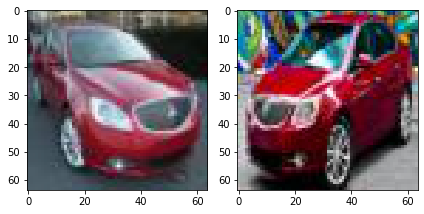

In [ ]:
disc_anc = base_network.predict(test_pairs[:, 0])
disc_pair = base_network.predict(test_pairs[:, 1])
idx=-600

for i in range(len(disc_anc[idx])):
  if((disc_anc[idx][i] != 0.0) or (disc_pair[idx][i] != 0.0)):
    print(i, disc_anc[idx][i], disc_pair[idx][i])

plt.subplot(1,2,1)
imshow(test_pairs[idx, 0])
plt.subplot(1,2,2)
imshow(test_pairs[idx, 1])

# Training

In [ ]:
%cd '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate'

/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate


In [ ]:
epochs = 10
BS = 128
dim = (64, 64)

NUM_TRAIN_PAIRS = len(train_pos_pair_names)
NUM_VAL_PAIRS = len(val_pos_pair_names)
NUM_TEST_PAIRS = len(test_pos_pair_names)

train_dir= '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate/image_train'
test_val_dir='/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate/image_test'


train_gen = pairs_generator(train_pos_pair_names, train_neg_pair_names, BS, train_dir, dim, aug=True)
val_gen   = pairs_generator(val_pos_pair_names, val_neg_pair_names, BS, test_val_dir, dim, aug=False)
test_gen  = pairs_generator(test_pos_pair_names, test_neg_pair_names, BS, test_val_dir, dim, aug=False)

train_stanford_gen = pairs_generator(stanford_train_pos_pair_names1 + stanford_train_pos_pair_names2,
                                     stanford_train_neg_pair_names1 + stanford_train_neg_pair_names2,
                                     BS, train_dir, dim, aug=True)


In [ ]:
lr = 1e-4
opt = RMSprop(learning_rate=lr)
model.compile(loss=contrastive_loss, optimizer=opt, metrics=[accuracy])
#model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

In [ ]:
# train
epochs=50

checkpoints_dir =  '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/Omar_checkpoints/'
train_gen =  pairs_generator(train_pos_pair_names, train_neg_pair_names,
                             BS, train_dir, dim, aug=True)

for i in range(epochs):
  print(str(i+1)+'/'+str(epochs))

  history = model.fit(train_gen,
                      steps_per_epoch= NUM_TRAIN_PAIRS // BS,
                      batch_size=BS,
                      epochs=1,
                      validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_labels),
                      validation_steps=NUM_VAL_PAIRS // BS
                      )
  
  pred_stan = model.predict([val_pairs[-598:, 0], val_pairs[-598:, 1]])
  stan_acc = compute_accuracy(val_labels[-598:], pred_stan, 0.5)
  print('Stanford Data Accuracy = ', str(stan_acc))

  if(history.history['val_accuracy'][0]>best_val_acc):
    best_val_acc = history.history['val_accuracy'][0]
    model.save_weights(checkpoints_dir + 'Mark6_best_weights.h5')
    model.save(checkpoints_dir + 'Mark6_best.h5')

  if(i<10):
    model.save_weights(checkpoints_dir + 'Mark6_8_weights.h5')
  elif(i<20):
    model.save_weights(checkpoints_dir + 'Mark6_9_weights.h5')
  elif(i<30):
    model.save_weights(checkpoints_dir + 'Mark6_10_weights.h5')
  elif(i<40):
    model.save_weights(checkpoints_dir + 'Mark6_11_weights.h5')
  else:
    model.save_weights(checkpoints_dir + 'Mark6_12_weights.h5')

1/50
221/221 [==============================] - 116s 526ms/step - loss: 0.1211 - accuracy: 0.9009 - val_loss: 0.1389 - val_accuracy: 0.8659
Stanford Data Accuracy =  0.7892976588628763
2/50
221/221 [==============================] - 118s 533ms/step - loss: 0.1152 - accuracy: 0.9054 - val_loss: 0.1384 - val_accuracy: 0.8658
Stanford Data Accuracy =  0.7892976588628763
3/50
221/221 [==============================] - 118s 534ms/step - loss: 0.1121 - accuracy: 0.9063 - val_loss: 0.1355 - val_accuracy: 0.8649
Stanford Data Accuracy =  0.7876254180602007
4/50
221/221 [==============================] - 117s 531ms/step - loss: 0.1073 - accuracy: 0.9115 - val_loss: 0.1320 - val_accuracy: 0.8739
Stanford Data Accuracy =  0.7959866220735786
5/50
221/221 [==============================] - 117s 530ms/step - loss: 0.1055 - accuracy: 0.9121 - val_loss: 0.1324 - val_accuracy: 0.8685
Stanford Data Accuracy =  0.7892976588628763
6/50
221/221 [==============================] - 113s 510ms/step - loss: 0.1

In [ ]:
model.save_weights(checkpoints_dir + 'Mark6_1_weights.h5')
model.save(checkpoints_dir + 'Mark6_1.h5')

In [ ]:
pred_val = model.predict([val_pairs[:, 0], val_pairs[:, 1]])
pred_test = model.predict([test_pairs[:, 0], test_pairs[:, 1]])
print('val_accuracy: ' + str(compute_accuracy(val_labels[:], pred_val)))
print('test_accuracy: ' + str(compute_accuracy(test_labels[:], pred_test)))

val_accuracy: 0.8352832795946569
test_accuracy: 0.8379685053872364


In [ ]:
S_pred_val = model.predict([val_pairs[-600:, 0], val_pairs[-600:, 1]])
S_pred_test = model.predict([test_pairs[-600:, 0], test_pairs[-600:, 1]])
print('Stanford_val_accuracy: ' + str(compute_accuracy(val_labels[-600:], S_pred_val)))
print('Stanford_test_accuracy: ' + str(compute_accuracy(test_labels[-600:], S_pred_test)))

Stanford_val_accuracy: 0.7033333333333334
Stanford_test_accuracy: 0.705


# Load Test Data (No Generator)

In [ ]:
# This function here can load the entire training VeRi dataset
# But it will face some memory problems

def create_pairs_no_gen(pos_names, neg_names, data_dir, dim = (64, 64)):
  pairs = []
  labels = []
  
  # Mirror the second half of the data the has length = 73890 triplte
  mirrorring_mask = [0 for i in range(37103)] + [1 for i in range(len(pos_names) - 37103)]

  for i in range(len(pos_names)):

    anc = resize(imread(os.path.join(data_dir, pos_names[i][0])), dim)
    pos = resize(imread(os.path.join(data_dir, pos_names[i][1])), dim)
    neg = resize(imread(os.path.join(data_dir, neg_names[i][1])), dim)

    if(mirrorring_mask[i] == 1):
      ## Flip Horizontaly
      anc = anc[:, -1::-1]
      pos = pos[:, -1::-1]
      neg = neg[:, -1::-1]

    pairs += [np.array([anc, pos])]
    pairs += [np.array([anc, neg])]

    labels += [0, 1]

    if(i%100==0):
      clear_output()
      print(str(i) + '/'+str(len(pos_names)))

  clear_output()
  print(str(len(pos_names)) + '/'+str(len(pos_names)))  
  print('Done')

  return np.array(pairs), np.array(labels)

data_dir = '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate/image_test'
dim = (64, 64)

#val_pairs, val_labels = create_pairs_no_gen(val_pos_pair_names, val_neg_pair_names, data_dir, dim)
#test_pairs, test_labels = create_pairs_no_gen(test_pos_pair_names, test_neg_pair_names, data_dir, dim)

#print(val_pairs.shape)
#print(val_labels.shape)
#print(test_pairs.shape)
#print(test_labels.shape)

10855/10855
Done
(21710, 2, 64, 64, 3)
(21710,)


# Optimize Weights by rounding before testing

In [ ]:
## Create Rounded array for setting the weights with it
round_num = 5
W = model.weights
W_rounded = []

for l in range(len(W)):
  W_rounded.append(np.around(W[l].numpy(), round_num))

model.set_weights(W_rounded)

print(len(W))
len(W_rounded)

In [ ]:
## Test
idx = 1
xo_1 = model.weights[idx].numpy()
x_1 = W_rounded[idx]
for i in range(len(x_1)):
  print(xo_1[i], x_1[i])

#Testing the Model (Evaluation and Confusion Matrix)

In [ ]:
# Test the testset that is previously loaded
y_true = deepcopy(test_labels)
y_pred = model.predict([test_pairs[:, 0], test_pairs[:, 1]], verbose=1) 

In [ ]:
thr = 0.5

mask_pos = y_pred < thr
mask_neg = y_pred >= thr
y_pred[mask_pos] = 1
y_pred[mask_neg] = 0

data = confusion_matrix(y_true, y_pred)
data

In [ ]:
df_cm = pd.DataFrame(data, columns=[1, 0], index = [1, 0])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,4))
sn.set(font_scale=1) #for label size
sn.heatmap(df_cm, cmap="Blues", annot=True ,annot_kws={ "size": 16})# font size

In [ ]:
mask_FP = np.logical_and((y_pred[:,0]==1.0), (y_true==0.0))
FP = test_pairs[mask_FP]

mask_FN = np.logical_and((y_pred[:,0]==0.0), (y_true==1.0))
FN = test_pairs[mask_FN]

print('NO. of False Positives = ' + str(len(FP)))
print('NO. of False Negatives = ' + str(len(FN)))

### Check False Positives

In [ ]:
idx = 18
plt.subplot(1,2,1)
imshow(FP[idx][0])
plt.subplot(1,2,2)
imshow(FP[idx][1])

### Check False Negatives

In [ ]:
idx = 15
plt.subplot(1,2,1)
imshow(FN[idx][0])
plt.subplot(1,2,2)
imshow(FN[idx][1])

### ROC Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946


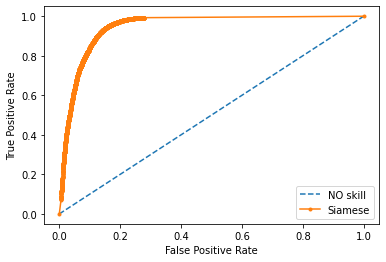

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred = model.predict([test_pairs[:, 0], test_pairs[:, 1]], verbose=1)

ns_probs = [0 for _ in range(len(test_labels))]
lr_probs = deepcopy(y_pred)
for i in range(len(lr_probs)):
  lr_probs[i] = 1 - lr_probs[i]
lr_probs[lr_probs<0] = 0

# calculate scores
ns_auc = roc_auc_score(test_labels, ns_probs)
lr_auc = roc_auc_score(test_labels, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_labels, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='NO skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Siamese')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision-Recall curve

Logistic: f1=0.875 auc=0.923


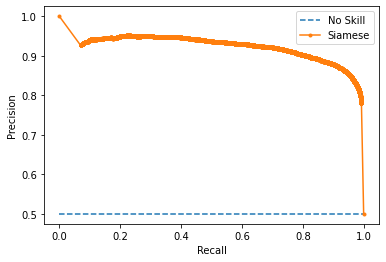

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

#y_pred = model.predict([test_pairs[:, 0], test_pairs[:, 1]], verbose=1)
yhat = deepcopy(y_pred)

thr = 0.5
mask_pos = y_pred < thr
mask_neg = y_pred >= thr
yhat[mask_pos] = 1
yhat[mask_neg] = 0

# keep probabilities for the positive outcome only
lr_probs = deepcopy(y_pred)
for i in range(len(lr_probs)):
  lr_probs[i] = 1 - lr_probs[i]
lr_probs[lr_probs<0] = 0

# predict class values
lr_precision, lr_recall, _ = precision_recall_curve(test_labels, lr_probs)
lr_f1, lr_auc = f1_score(test_labels, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(test_labels[test_labels==1]) / len(test_labels)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Siamese')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

# CMC metric


In [ ]:
%cd '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/dataset for cars/Car_Recognition_Datasets'
df = pd.read_csv('Testing_data_with_IDs.csv')
df["anchors"]
pos_test_ids = df.pos_id.tolist()
neg_test_ids = df.neg_id.tolist()

def calculate_rank(vector):
  a={}
  rank=0
  for num in sorted(vector):
    if num not in a:
      a[num]=rank
      rank=rank+1
  return[a[i] for i in vector]


pos_test_ids_ranked=calculate_rank(pos_test_ids)
neg_test_ids_ranked=calculate_rank(neg_test_ids)


def create_sets(pairs,ids):
  set_a=[]
  set_b=[]
  set_c=[]
  sets_combined = random.sample(range(ids[-1]), 19)
  #sets_combined.sort()
  x = sets_combined[0:9]
  y = sets_combined[9:]
 # y[4]=9
  for i in range (9):
    
    for j in range (len(ids)):
      if (ids[j] == x[i]) :
        set_a.append(pairs[2*j][0])
        break

  for i in range (9):
    
    for j in range (len(ids)):
      if (ids[j] == y[i]) :
        set_b.append(pairs[2*j][1])
        break
  
  for i in range (len(ids)):
      if (ids[i] == y[-1]) :
        set_a.append(pairs[2*j][0])
        set_b.append(pairs[2*j][1])
        break 
   
    
  for i in range (10):
    for j in range (10):
      set_c.append(set_b[i])
  
  return np.array(set_a),np.array(set_c),np.array(set_b)


def prediction_sets(pairs,ids):
  set_a,set_c,set_b=create_sets(pairs,ids)

  xset= model.predict([set_a,set_c[0:10]])
  for i in range (9):
    yset= model.predict([set_a,set_c[ i*10 : (i*10)+10 ]])
    xset=np.append(xset, yset)
  return xset


def cmc(pairs,ids):
  mat=[0 for _ in range(100)]
  for i in range (1000):
    xset = prediction_sets(pairs,ids)
    rank = calculate_rank(xset)
    for j in range (100):
      if (rank[99] <= j):
        mat[j]+=1
  cmc_score = []
  cmc_score = [number / 1000 for number in mat]
  return cmc_score,mat


cmc_score,mat= cmc(Test_VeRi_pairs,pos_test_ids_ranked)

In [ ]:
default_color = ['r','g','b','c','m','y','orange','brown']
default_marker = ['*','o','s','v','X','*','.','P']

class CMC:
    def __init__(self,cmc_dict, color=default_color, marker = default_marker):
        self.color = color
        self.marker = marker
        self.cmc_dict = cmc_dict
        
    def plot(self,title,rank=20, xlabel='Rank',ylabel='Matching Rates (%)',show_grid=True):        
        fig, ax = plt.subplots()
        fig.suptitle(title)
        x = list(range(0, rank+1, 5))
        plt.ylim(0, 1.0)
        plt.xlim(1, rank)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(x)
        plt.grid(show_grid)

        method_name = []
        i = 0
        for name in self.cmc_dict.keys():
            if rank < len(self.cmc_dict[name]):
                temp_cmc = self.cmc_dict[name][:rank]
                r = list(range(1, rank+1))
            else:
                temp_cmc = self.cmc_dict[name]
                r = list(range(1, len(temp_cmc)+1))
                
            if name == list(self.cmc_dict.keys())[-1]:
                globals()[name] = mlines.Line2D(r, temp_cmc, color=self.color[0], marker=self.marker[0], label='{:.1f}% {}'.format(self.cmc_dict[name][0]*100, name))
            else:
                globals()[name] = mlines.Line2D(r, temp_cmc, color=self.color[i+1], marker=self.marker[i+1], label='{:.1f}% {}'.format(self.cmc_dict[name][0]*100, name))
                i = i+1
            ax.add_line(globals()[name])
            method_name.append(globals()[name])

        plt.legend(handles=method_name)
        plt.show()
    
    def save(self, title, filename, 
             rank=20, xlabel='Rank',
             ylabel='Matching Rates (%)', show_grid=True,
             save_path=os.getcwd(), format='png', **kwargs):
        fig, ax = plt.subplots()
        fig.suptitle(title)
        x = list(range(0, rank+1, 5))
        plt.ylim(0, 1.0)
        plt.xlim(1, rank)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.xticks(x)
        plt.grid(show_grid)

        method_name = []
        i = 0
        for name in self.cmc_dict.keys():
            if rank < len(self.cmc_dict[name]):
                temp_cmc = self.cmc_dict[name][:rank]
                r = list(range(1, rank+1))
            else:
                temp_cmc = self.cmc_dict[name]
                r = list(range(1, len(temp_cmc)+1))
                
            if name == list(self.cmc_dict.keys())[-1]:
                globals()[name] = mlines.Line2D(r, temp_cmc, color='r', marker='*', label='{:.1f}% {}'.format(self.cmc_dict[name][0]*100, name))
            else:
                globals()[name] = mlines.Line2D(r, temp_cmc, color=self.color[i], marker=self.marker[i], label='{:.1f}% {}'.format(self.cmc_dict[name][0]*100, name))
                i = i+1
            ax.add_line(globals()[name])
            method_name.append(globals()[name])

        plt.legend(handles=method_name)
        fig.savefig(os.path.join(save_path,filename+'.'+format), 
                    format=format,
                    bbox_inches='tight',
                    pad_inches = 0, **kwargs)

In [ ]:
%matplotlib inline
cmc_dict ={
    'Proposed': cmc_score
}

In [ ]:
cmc = CMC(cmc_dict)

#custimised color and marker
new_color = ['r','g','b','c','m','y','orange','brown']
new_marker = ['*','o','s','v','X','*','.','P']
cmc = CMC(cmc_dict,color=new_color,marker=new_marker)

In [ ]:
cmc.plot(title = 'CMC on CUHK01', rank=100,
         xlabel='Rank Score',
         ylabel='Recognition Rate', show_grid=False)

# Siamese Network Pruning training

### Loading the model to be pruned

In [ ]:
def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

In [ ]:
weights_dir = '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/Omar_checkpoints/'
siamese_model = load_model(weights_dir + 'Mark20_2.h5',  custom_objects={'contrastive_loss': contrastive_loss})

### Pruning Functions

In [ ]:
def prune_weights(w, threshold):
  # prune weights that are smaller then threshold - make them zero
  pruning_mask_data = (np.abs(w) >= threshold).astype(np.float32) 
  w_p = pruning_mask_data*w
  return w_p, pruning_mask_data

def prune_weights_gradient(grad,pruning_mask_data):
  return grad * pruning_mask_data

# for numerical stability
#def prune_weights_update(pruning_mask_data):

### Prune the weights

In [ ]:
threshold = 0.1

w_pruning = []
pruning_mask = []
# Pruning
for layer in range(len(siamese_model.weights)):
  if(siamese_model.weights[layer].numpy().ndim == 4):
    w_p, pruning_mask_data = prune_weights(siamese_model.weights[layer].numpy(), threshold)
    w_pruning.append(w_p)
    pruning_mask.append(pruning_mask_data)
  else:
    w_pruning.append(siamese_model.weights[layer].numpy())
    #pruning_mask.append(1)

siamese_model.set_weights(w_pruning)
print('done pruning')

### Pruning Training

#### Training functions

In [ ]:
loss_object = tf.keras.losses.BinaryCrossentropy()

optimizer = tf.keras.optimizers.SGD()
#optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.Mean(name='train_accuracy')

In [ ]:
@tf.function
def train_step(pairs, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = siamese_model(pairs, training=True)
    #loss = loss_object(labels, predictions)
    loss = contrastive_loss(labels, predictions)
    acc = accuracy(labels, predictions)

  gradients = tape.gradient(loss, siamese_model.trainable_variables)
  
  # Apply Purning mask to the gradient
  grad_pruning = []
  counter = 0
  #for layer in range(len(gradients)):
  #  if(gradients[layer].numpy().ndim == 4):
  #    grad_pruning.append(prune_weights_gradient(gradients[layer], pruning_mask[counter]))
  #    counter+=1
  #  else:
  #    grad_pruning.append(gradients[layer].numpy())

  for layer in range(len(gradients)):
    if(len(K.shape(gradients[layer])) == 4):
      grad_pruning.append(prune_weights_gradient(gradients[layer], pruning_mask[counter]))
      counter+=1
    else:
      grad_pruning.append(gradients[layer])

  optimizer.apply_gradients(zip(grad_pruning, siamese_model.trainable_variables))

  train_loss(loss)
  train_accuracy(acc)

#### Training Loop

In [ ]:
epochs = 10
BS = 128
dim = (64, 64)

NUM_TRAIN_PAIRS = len(train_pos_pair_names)
NUM_VAL_PAIRS = len(val_pos_pair_names)
NUM_TEST_PAIRS = len(test_pos_pair_names)

train_dir= '/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate/image_train'
test_val_dir='/content/drive/My Drive/Graduation Project/Machine Learning Subteam/Car_Recognition_Datasets/VeRi_with_plate/image_test'


train_gen = pairs_generator(train_pos_pair_names, train_neg_pair_names, BS, train_dir, dim, aug=None)
val_gen   = pairs_generator(val_pos_pair_names, val_neg_pair_names, BS, test_val_dir, dim, aug=None)
test_gen  = pairs_generator(test_pos_pair_names, test_neg_pair_names, BS, test_val_dir, dim, aug=None)

In [ ]:
for epoch in range(epochs):
  print('Epoch: '+str(epoch+1)+'/'+str(epochs)+' - '+str(NUM_TRAIN_PAIRS//BS)+' steps')
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()

  training_step = 0
  for pair, label in train_gen:
    if(training_step%10 == 0):
      print(training_step, end=' ')

    train_step(pair, label)
    training_step+=1

    if(training_step == NUM_TRAIN_PAIRS//BS):
      break

  model.save_weights(weights_dir + 'pruned_mark1')
  print()
  template = 'Epoch {}, Loss: {}, Accuracy: {}'
  print(template.format(epoch+1, 
                        train_loss.result(), 
                        train_accuracy.result()*100
                        )
  )

#### Testing

In [ ]:
siamese_model.evaluate(test_gen, steps=NUM_TEST_PAIRS//BS, verbose=1)

In [ ]:
 for w in siamese_model.weights:
   i = w.numpy() > 0
   #if(i.ndim == 4):
   print(str(np.sum(i)//1),'/',str(len(np.reshape(i,(-1,1))) ))

In [ ]:
 for w in siamese_model.weights:
   i = w.numpy() > 0
   #if(i.ndim == 4):
   print(str(np.sum(i)//1),'/',str(len(np.reshape(i,(-1,1))) ))